# Iris 
#### by Alex Joseph

### Attribute Information
- sepal length
- sepal width
- petal length
- petal width
- class 

### Importing Necessary Packages

In [1]:
# For data manipulation and preprocessing

import pandas as pd
import numpy as np

# For Visualization

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

# For normalizing the distribution

from sklearn.preprocessing import StandardScaler

# For dimensionality reduction

from sklearn.decomposition import PCA

# For modelling 

from sklearn.model_selection import train_test_split, learning_curve
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

from sklearn.metrics import accuracy_score

# Miscellaneous

import warnings
warnings.filterwarnings('ignore')

In [2]:
columns = ['sepal_len', 'sepal_wid', 'petal_len', 'petal_wid', 'class']

In [3]:
data = pd.read_csv("iris.csv", names=columns)
data.head()

,sepal_len,sepal_wid,petal_len,petal_wid,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
data.shape

(150, 5)

In [5]:
data.isnull().sum()

sepal_len    0
sepal_wid    0
petal_len    0
petal_wid    0
class        0
dtype: int64

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   sepal_len  150 non-null    float64
 1   sepal_wid  150 non-null    float64
 2   petal_len  150 non-null    float64
 3   petal_wid  150 non-null    float64
 4   class      150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [7]:
data.describe()

,sepal_len,sepal_wid,petal_len,petal_wid
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [8]:
labels = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
num_class = [0,1,2]

data.replace(labels, num_class, inplace=True)

### Feature Analysis and Engineering

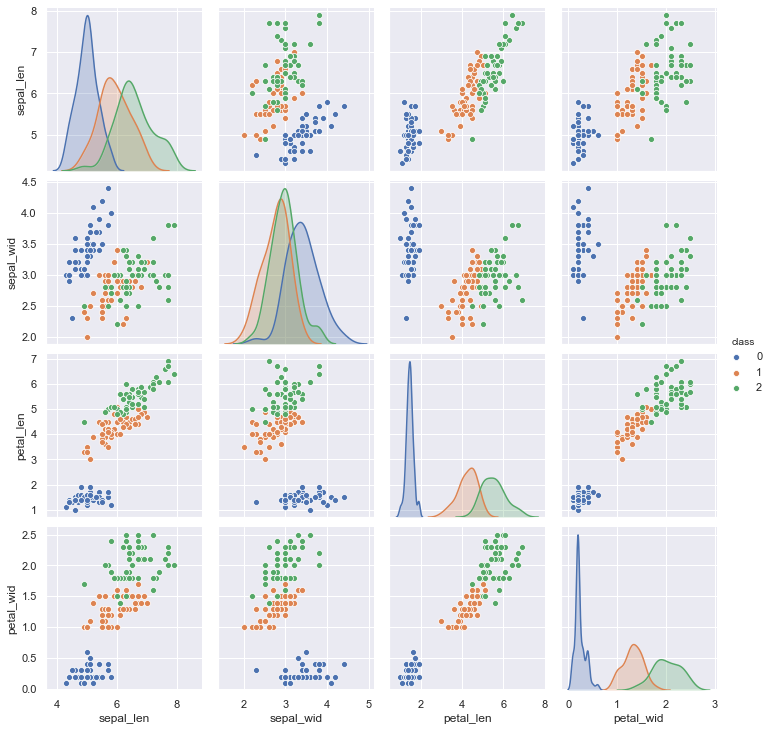

In [9]:
sns.pairplot(data, hue='class');

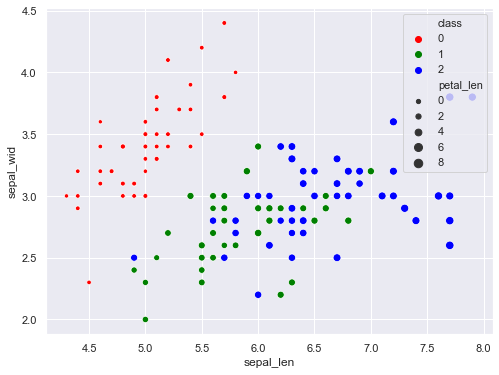

In [40]:
# Sepal length vs Sepal Width (size = petal length)

plt.figure(figsize=(8,6))
sns.scatterplot('sepal_len', 'sepal_wid', size='petal_len', data=data, hue='class', palette=['red', 'green', 'blue']);

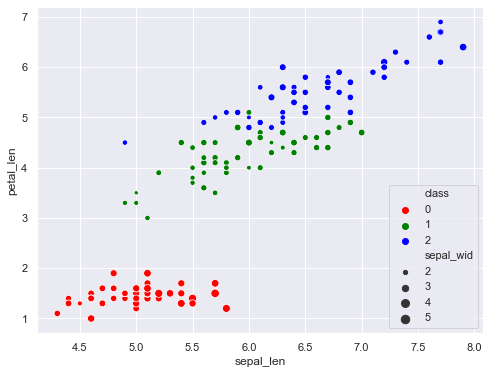

In [41]:
# Sepal Length vs Petal Length (size=sepal width)

plt.figure(figsize=(8,6))
sns.scatterplot('sepal_len', 'petal_len', size='sepal_wid',data=data, hue='class', palette=['red', 'green', 'blue']);

## Modelling

In [12]:
X = data.iloc[:, :-1]
y = data.iloc[:, -1]

In [13]:
# Splitting the data

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=10, test_size=0.3)

### Random Forest

In [15]:
rfc = RandomForestClassifier(n_estimators=100,
                             random_state=10)

rfc.fit(X_train, y_train)
y_predict = rfc.predict(X_test)
accuracy_score(y_test, y_predict)

0.9777777777777777

### XGBoost

In [16]:
xgb = XGBClassifier()

xgb.fit(X_train, y_train)
y_predict = xgb.predict(X_test)
accuracy_score(y_test, y_predict)

0.9777777777777777

In [17]:
# Calculating the learning curve

def plot_curve(model, X, y, title=None, cv=5, parts=5):
    '''Function to plot the trainig and cross-validation curves'''
    import warnings
    warnings.filterwarnings('ignore')
    
    # Setting the figure characteristics
    
    plt.figure(figsize=(8,6))
    plt.title(title)
    plt.xlabel("Training size")
    plt.ylabel("Score")
    
    # Calculating the training and cross validation scores
    
    t_size = np.linspace(0.1, 1.0, parts)
    train_sizes, train_scores, test_scores = learning_curve(model, X, y, cv=cv, train_sizes=t_size)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    
    # Plotting the graph
    
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.25, color='b');
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.25, color='r');
    
    plt.plot(train_sizes, train_scores_mean, '-o', label="Training");
    plt.plot(train_sizes, test_scores_mean, '-o', label="Cross-validation");
    
    plt.legend(loc='best');
    
    return plt;

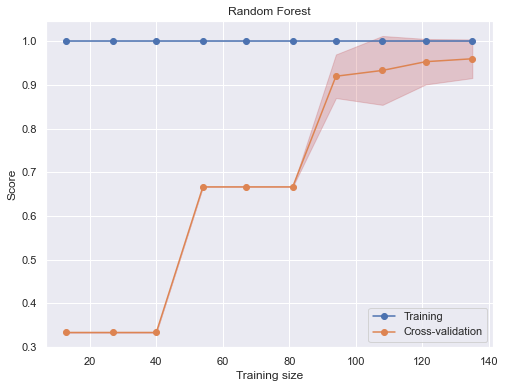

In [18]:
plot_curve(rfc, X, y, "Random Forest", 10, 10);

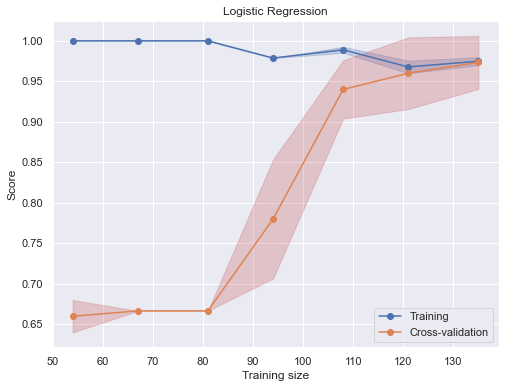

In [19]:
plot_curve(logreg, X, y, "Logistic Regression", 10, 10);

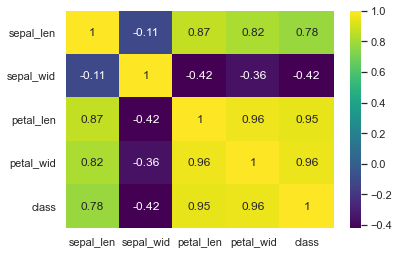

In [20]:
sns.heatmap(data.corr(), annot=True, cmap='viridis');

 Since many of the features are correlated to each other by large amounnts, we can employ a dimensionality reduction technique and capture the variances thereby not having to use all the four features.

In [21]:
# Employing PCA for dimensionality reduction

pca = PCA()
X_pca = pca.fit_transform(X)

In [22]:
# Explained Variance Ratio

pca.explained_variance_ratio_

array([0.92461621, 0.05301557, 0.01718514, 0.00518309])

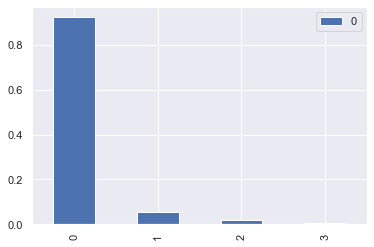

In [23]:
# Explained Variance Ratio Graphical Representation

pd.DataFrame(pca.explained_variance_ratio_).plot(kind='bar');

In [24]:
# Dropping the last two rows of the recorded variance

X_pca = X_pca[:,:-2]

In [25]:
# Splitting the data into train and test sets after applying PCA

X_train, X_test, y_train, y_test = train_test_split(X_pca, y, random_state=10, test_size=0.3)

## Modelling after PCA

### Random Forest 

In [29]:
rfc = RandomForestClassifier(n_estimators=100,
                             random_state=10)

rfc.fit(X_train, y_train)
y_predict = rfc.predict(X_test)
accuracy_score(y_test, y_predict)

1.0

In [30]:
pd.crosstab(y_test, y_predict)

col_0,0,1,2
class,,,
0,14,0,0
1,0,17,0
2,0,0,14


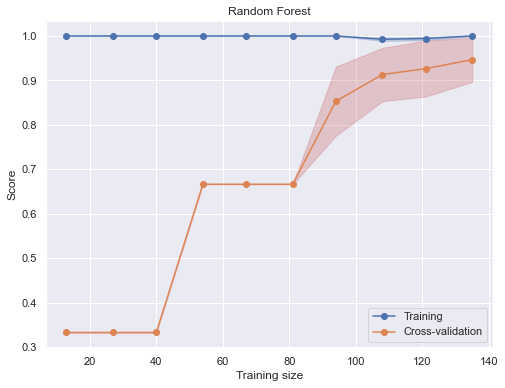

In [31]:
plot_curve(rfc, X_pca, y, "Random Forest", 10,10);

### XGBoost

In [32]:
xgb.fit(X_train, y_train)
y_predict = xgb.predict(X_test)
accuracy_score(y_test, y_predict)

0.9777777777777777

In [33]:
pd.crosstab(y_test, y_predict)

col_0,0,1,2
class,,,
0,14,0,0
1,0,16,1
2,0,0,14


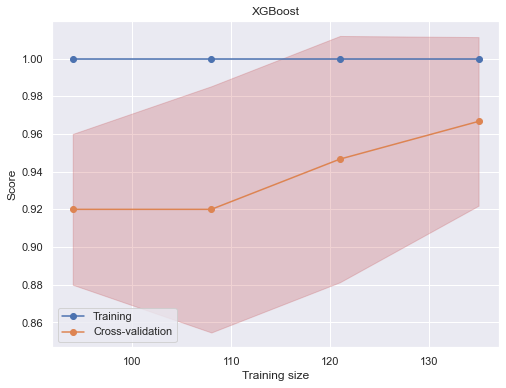

In [38]:
plot_curve(xgb, X_pca, y, "XGBoost", 10, 10);

It appears that the Random Forest Classifier has the best outcome out of the two as its prediction does not vary much unlike XGBoost which has a huge variance in the score

In [ ]:
                                  ### END OF PROJECT ###